**Name:** Shreya Vinay Nayak

**Github Username:** ShreyaNayak256

**USC ID:** 8592810456

**i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).**

Ans: The time domain features that are usually used in time series classification are as follows:
Minimum, maximum, mean, median, standard deviation, first quartile, and third quartile, kurtosis, skewness, entropy etc.

**ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.[2]**


In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.feature_selection import chi2
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('../data/training/bending1/dataset7.csv')
df.head()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.00,18.50,0.50,12.00,0.00
1,250,42.00,0.00,18.00,0.00,11.33,0.94
2,500,42.75,0.43,16.75,1.79,18.25,0.43
3,750,42.50,0.50,16.75,0.83,19.00,1.22
4,1000,43.00,0.82,16.25,0.83,18.00,0.00


In [3]:
df.describe()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,59875.000000,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313
std,34677.081769,1.618364,0.263111,3.742420,0.788985,3.318301,0.487826
min,0.000000,36.250000,0.000000,1.500000,0.000000,11.330000,0.000000
25%,29937.500000,43.310000,0.430000,14.250000,0.000000,20.500000,0.000000
50%,59875.000000,44.500000,0.470000,16.250000,0.470000,21.670000,0.490000
75%,89812.500000,44.670000,0.500000,18.000000,0.940000,23.750000,0.830000
max,119750.000000,48.000000,1.500000,26.330000,5.170000,30.750000,2.960000


In [4]:
df.describe().iloc[[3,7,1,5,2,4,6]].transpose()

,min,max,mean,50%,std,25%,75%
time,0.00,119750.00,59875.000000,59875.00,34677.081769,29937.50,89812.50
avg_rss12,36.25,48.00,43.969125,44.50,1.618364,43.31,44.67
var_rss12,0.00,1.50,0.413125,0.47,0.263111,0.43,0.50
avg_rss13,1.50,26.33,15.868021,16.25,3.742420,14.25,18.00
var_rss13,0.00,5.17,0.666354,0.47,0.788985,0.00,0.94
avg_rss23,11.33,30.75,22.103750,21.67,3.318301,20.50,23.75
var_rss23,0.00,2.96,0.555313,0.49,0.487826,0.00,0.83


In [5]:
def processing(directory):
    main_df = pd.DataFrame()
    #for files in os.walk
    for root, dirs, files in os.walk(directory):
        for filename in files:
            print(os.path.join(root, filename))
            #print(filename)
            if filename!=".DS_Store":
                df= pd.read_csv(os.path.join(root, filename))
                df.drop('time',axis=1,inplace= True)
                num_nans=0
                for i in list(df.columns):
                    num_nans += sum(df[i].isna())
                if(num_nans>0):
                    print("Missing Values!")
#                 df.fillna(0,inplace=True)
                x= df.describe().iloc[[3,7,1,5,2,4,6]].transpose()
                new_df = pd.DataFrame(list(x.loc[x.index[0]])).transpose()
                for i in range(1,len(x)):
                    new_df = pd.concat([new_df,pd.DataFrame(list(x.loc[x.index[i]])).transpose()],axis = 1)
                main_df = pd.concat([main_df,new_df])
    main_df.columns = ['min1','max1','mean1','median1','std1','1st quart1','3rd quart1',
                      'min2','max2','mean2','median2','std2','1st quart2','3rd quart2',
                      'min3','max3','mean3','median3','std3','1st quart3','3rd quart3',
                      'min4','max4','mean4','median4','std4','1st quart4','3rd quart4',
                      'min5','max5','mean5','median5','std5','1st quart5','3rd quart5',
                      'min6','max6','mean6','median6','std6','1st quart6','3rd quart6']
    return main_df

In [6]:
# checking processing and finding datasets with null values

In [7]:
train_df=processing('../data/training')

../data/training/.DS_Store
../data/training/bending1/dataset7.csv
../data/training/bending1/dataset6.csv
../data/training/bending1/dataset4.csv
../data/training/bending1/dataset5.csv
../data/training/bending1/.DS_Store
../data/training/bending1/dataset3.csv
../data/training/walking/dataset7.csv
../data/training/walking/dataset6.csv
../data/training/walking/dataset4.csv
../data/training/walking/dataset5.csv
../data/training/walking/.DS_Store
../data/training/walking/dataset10.csv
../data/training/walking/dataset11.csv
../data/training/walking/dataset13.csv
../data/training/walking/dataset12.csv
../data/training/walking/dataset15.csv
../data/training/walking/dataset14.csv
../data/training/walking/dataset8.csv
../data/training/walking/dataset9.csv
../data/training/bending2/dataset6.csv
../data/training/bending2/dataset4.csv
../data/training/bending2/dataset5.csv
../data/training/bending2/.DS_Store
../data/training/bending2/dataset3.csv
../data/training/standing/dataset7.csv
../data/traini

In [8]:
test_df=processing('../data/testing')

../data/testing/.DS_Store
../data/testing/bending1/dataset1.csv
../data/testing/bending1/.DS_Store
../data/testing/bending1/dataset2.csv
../data/testing/walking/dataset1.csv
../data/testing/walking/.DS_Store
../data/testing/walking/dataset2.csv
../data/testing/walking/dataset3.csv
../data/testing/bending2/dataset1.csv
../data/testing/bending2/.DS_Store
../data/testing/bending2/dataset2.csv
../data/testing/standing/dataset1.csv
../data/testing/standing/.DS_Store
../data/testing/standing/dataset2.csv
../data/testing/standing/dataset3.csv
../data/testing/sitting/dataset1.csv
../data/testing/sitting/.DS_Store
../data/testing/sitting/dataset2.csv
../data/testing/sitting/dataset3.csv
../data/testing/lying/dataset1.csv
../data/testing/lying/.DS_Store
../data/testing/lying/dataset2.csv
../data/testing/lying/dataset3.csv
../data/testing/cycling/dataset1.csv
../data/testing/cycling/.DS_Store
../data/testing/cycling/dataset2.csv
../data/testing/cycling/dataset3.csv


In [9]:
#dealing with ../data/training/bending2/dataset4.csv
f = open('../data/training/bending2/dataset4.csv','r')
lines = f.readlines()
# for l in range(len(lines)):
#     lines[l].replace(' ',',')
# f.writelines(lines)
f.close()
f = open('../data/training/bending2/dataset4.csv','w')
for l in range(len(lines)):
    lines[l]=lines[l].replace(' ',',')
f.write(''.join(lines).replace(',\n','\n'))
f.close()

In [10]:
''.join(lines)

'time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23\n0,32.50,0.50,0.00,0.00,19.00,1.00\n250,32.50,0.50,0.00,0.00,18.50,0.50\n500,32.75,0.43,1.00,0.00,18.00,0.00\n750,32.50,0.50,0.00,0.00,17.50,0.50\n1000,32.50,0.50,7.50,0.50,17.50,0.87\n1250,32.67,0.47,11.00,1.00,16.75,0.83\n1500,32.50,0.50,6.25,0.83,18.00,0.00\n1750,32.50,0.50,3.50,0.87,18.00,0.00\n2000,32.33,0.47,6.00,0.00,18.33,0.47\n2250,32.67,0.47,8.00,0.82,18.00,0.00\n2500,32.50,0.50,8.33,3.30,16.67,0.47\n2750,32.50,0.50,10.33,1.25,16.00,1.22\n3000,32.25,0.83,9.00,3.08,16.00,0.71\n3250,32.00,0.00,2.67,0.47,15.75,0.83\n3500,31.75,0.43,2.75,1.09,16.50,1.12\n3750,32.00,0.00,1.00,0.00,17.50,0.87\n4000,32.25,0.83,0.00,0.00,17.50,0.50\n4250,32.25,0.43,0.00,0.00,17.00,1.00\n4500,31.75,0.43,5.33,3.30,17.75,0.43\n4750,31.50,0.50,9.50,0.50,17.75,0.43\n5000,31.50,0.50,5.00,2.16,17.33,0.47\n5250,31.50,0.50,4.50,0.50,17.50,0.50\n5500,31.67,0.47,4.50,1.12,18.00,0.00\n5750,31.50,0.50,1.67,0.47,18.00,0.00\n6000,31.67,0.47,1.00,0.00

In [11]:
train_df=processing('../data/training')

../data/training/.DS_Store
../data/training/bending1/dataset7.csv
../data/training/bending1/dataset6.csv
../data/training/bending1/dataset4.csv
../data/training/bending1/dataset5.csv
../data/training/bending1/.DS_Store
../data/training/bending1/dataset3.csv
../data/training/walking/dataset7.csv
../data/training/walking/dataset6.csv
../data/training/walking/dataset4.csv
../data/training/walking/dataset5.csv
../data/training/walking/.DS_Store
../data/training/walking/dataset10.csv
../data/training/walking/dataset11.csv
../data/training/walking/dataset13.csv
../data/training/walking/dataset12.csv
../data/training/walking/dataset15.csv
../data/training/walking/dataset14.csv
../data/training/walking/dataset8.csv
../data/training/walking/dataset9.csv
../data/training/bending2/dataset6.csv
../data/training/bending2/dataset4.csv
../data/training/bending2/dataset5.csv
../data/training/bending2/.DS_Store
../data/training/bending2/dataset3.csv
../data/training/standing/dataset7.csv
../data/traini

In [12]:
test_df=processing('../data/testing')

../data/testing/.DS_Store
../data/testing/bending1/dataset1.csv
../data/testing/bending1/.DS_Store
../data/testing/bending1/dataset2.csv
../data/testing/walking/dataset1.csv
../data/testing/walking/.DS_Store
../data/testing/walking/dataset2.csv
../data/testing/walking/dataset3.csv
../data/testing/bending2/dataset1.csv
../data/testing/bending2/.DS_Store
../data/testing/bending2/dataset2.csv
../data/testing/standing/dataset1.csv
../data/testing/standing/.DS_Store
../data/testing/standing/dataset2.csv
../data/testing/standing/dataset3.csv
../data/testing/sitting/dataset1.csv
../data/testing/sitting/.DS_Store
../data/testing/sitting/dataset2.csv
../data/testing/sitting/dataset3.csv
../data/testing/lying/dataset1.csv
../data/testing/lying/.DS_Store
../data/testing/lying/dataset2.csv
../data/testing/lying/dataset3.csv
../data/testing/cycling/dataset1.csv
../data/testing/cycling/.DS_Store
../data/testing/cycling/dataset2.csv
../data/testing/cycling/dataset3.csv


In [13]:
train_df

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555313,0.490,0.487826,0.0000,0.8300
0,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700
0,33.00,47.75,42.179813,43.50,3.670666,39.1500,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000
0,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000
0,35.00,47.40,43.954500,44.33,1.558835,43.0000,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.0,1.79,0.493292,0.430,0.513506,0.0000,0.9400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,3.328104,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600
0,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000
0,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175
0,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.25,0.0,8.64,2.420083,...,2.851673,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300


In [14]:
test_df

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300
0,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300
0,19.33,43.50,34.227771,35.500,4.889576,30.5000,37.7500,0.0,14.50,3.995729,...,3.092094,14.7500,18.6700,0.0,9.74,3.394125,3.100,1.792090,2.1050,4.425
0,12.50,45.00,33.509729,34.125,4.850923,30.5000,36.7500,0.0,13.05,4.450771,...,3.133564,14.6275,18.7500,0.0,8.96,3.378479,3.085,1.787360,2.0600,4.440
0,15.00,46.75,34.660583,35.000,5.315110,31.0000,38.2500,0.0,13.44,4.200896,...,3.155015,14.2500,18.5000,0.0,8.99,3.244396,3.000,1.630983,2.1200,4.240
0,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,3.693786,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870
0,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,5.053642,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300
0,33.33,48.00,44.334729,45.000,2.476940,42.2500,46.5000,0.0,3.90,0.432958,...,5.401794,9.3300,17.7500,0.0,5.02,0.933000,0.830,0.673609,0.4700,1.250
0,35.50,46.25,43.174938,43.670,1.989052,42.5000,44.5000,0.0,2.12,0.506583,...,2.983976,12.7500,16.5000,0.0,5.72,0.911979,0.830,0.666161,0.4700,1.220
0,32.75,47.00,42.760563,44.500,3.398919,41.3300,45.3725,0.0,3.34,0.486167,...,4.296574,13.0000,18.5650,0.0,5.73,0.842271,0.710,0.722165,0.4300,1.090


In [15]:
num_nans=0
for i in list(train_df.columns):
    num_nans += sum(train_df[i].isna())
num_nans

0

**iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootstrap confidence interval for the standard deviation of each feature.**

In [16]:
for i in train_df.columns:
    print("Standard deviation of feature ",i,"is: ",train_df[i].std())

Standard deviation of feature  min1 is:  8.794294864591922
Standard deviation of feature  max1 is:  4.429181529313045
Standard deviation of feature  mean1 is:  4.917716534053914
Standard deviation of feature  median1 is:  4.956110901988048
Standard deviation of feature  std1 is:  1.7586291583940319
Standard deviation of feature  1st quart1 is:  5.731262069418449
Standard deviation of feature  3rd quart1 is:  4.7836451331946375
Standard deviation of feature  min2 is:  0.0
Standard deviation of feature  max2 is:  5.147841414381517
Standard deviation of feature  mean2 is:  1.6006605313356346
Standard deviation of feature  median2 is:  1.4369026168932897
Standard deviation of feature  std2 is:  0.9027694356426301
Standard deviation of feature  1st quart2 is:  0.9522006385488595
Standard deviation of feature  3rd quart2 is:  2.15825839012831
Standard deviation of feature  min3 is:  3.0538690677622298
Standard deviation of feature  max3 is:  4.75985339562324
Standard deviation of feature  me

In [17]:
#calculate 90% bootstrapped confidence interval for standard deviation of each feature
data = (train_df,)
ci_bootstrap = bootstrap(data, np.median, confidence_level=0.90,
                         random_state=1, method='percentile')
#view 90% boostrapped confidence interval
ci = ci_bootstrap.confidence_interval
print(ci)



ConfidenceInterval(low=array([26.75      , 45.        , 36.863375  , 36.29      ,  2.38410459,
       34.25      , 39.67      ,  0.        ,  2.83      ,  0.42966667,
        0.47      ,  0.39291425,  0.        ,  0.5       ,  1.        ,
       22.75      , 14.997375  , 15.        ,  3.11422211, 12.        ,
       17.33      ,  0.        ,  5.59      ,  0.74989583,  0.47      ,
        0.77739998,  0.        ,  0.955     ,  1.5       , 23.        ,
       15.2604375 , 15.75      ,  3.13482171, 13.25      , 18.        ,
        0.        ,  5.45      ,  0.85483333,  0.82      ,  0.72395306,
        0.46      ,  1.09      ]), high=array([34.5       , 46.25      , 42.11158333, 41.5       ,  3.58130107,
       39.75      , 42.75      ,  0.        ,  8.49      ,  0.58360417,
        0.5       ,  0.6308603 ,  0.47      ,  0.83      ,  5.        ,
       24.        , 15.46222917, 15.5       ,  3.58818252, 13.33      ,
       18.        ,  0.        ,  7.4       ,  0.88939583,  0.82      ,
 

In [18]:
ci[0]

array([26.75      , 45.        , 36.863375  , 36.29      ,  2.38410459,
       34.25      , 39.67      ,  0.        ,  2.83      ,  0.42966667,
        0.47      ,  0.39291425,  0.        ,  0.5       ,  1.        ,
       22.75      , 14.997375  , 15.        ,  3.11422211, 12.        ,
       17.33      ,  0.        ,  5.59      ,  0.74989583,  0.47      ,
        0.77739998,  0.        ,  0.955     ,  1.5       , 23.        ,
       15.2604375 , 15.75      ,  3.13482171, 13.25      , 18.        ,
        0.        ,  5.45      ,  0.85483333,  0.82      ,  0.72395306,
        0.46      ,  1.09      ])

In [19]:
ci[1]

array([34.5       , 46.25      , 42.11158333, 41.5       ,  3.58130107,
       39.75      , 42.75      ,  0.        ,  8.49      ,  0.58360417,
        0.5       ,  0.6308603 ,  0.47      ,  0.83      ,  5.        ,
       24.        , 15.46222917, 15.5       ,  3.58818252, 13.33      ,
       18.        ,  0.        ,  7.4       ,  0.88939583,  0.82      ,
        1.01410192,  0.43      ,  1.2625    ,  4.67      , 24.        ,
       16.0555625 , 16.25      ,  3.37409516, 14.        , 18.5       ,
        0.        ,  6.85      ,  1.15508333,  0.94      ,  1.02592534,
        0.5       ,  1.3       ])

In [20]:
#Combining training and testing into a single dataset
# train_df.reset_index(inplace=True)
# test_df.reset_index(inplace=True)
df= pd.concat([train_df,test_df]).reset_index()
df.drop('index',axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   min1        88 non-null     float64
 1   max1        88 non-null     float64
 2   mean1       88 non-null     float64
 3   median1     88 non-null     float64
 4   std1        88 non-null     float64
 5   1st quart1  88 non-null     float64
 6   3rd quart1  88 non-null     float64
 7   min2        88 non-null     float64
 8   max2        88 non-null     float64
 9   mean2       88 non-null     float64
 10  median2     88 non-null     float64
 11  std2        88 non-null     float64
 12  1st quart2  88 non-null     float64
 13  3rd quart2  88 non-null     float64
 14  min3        88 non-null     float64
 15  max3        88 non-null     float64
 16  mean3       88 non-null     float64
 17  median3     88 non-null     float64
 18  std3        88 non-null     float64
 19  1st quart3  88 non-null     flo

In [21]:
for i in df.columns:
    print("Standard deviation of feature ",i,"is: ",df[i].std())

Standard deviation of feature  min1 is:  9.569975284512806
Standard deviation of feature  max1 is:  4.394361684703191
Standard deviation of feature  mean1 is:  5.335717658344175
Standard deviation of feature  median1 is:  5.440054137152637
Standard deviation of feature  std1 is:  1.772153397502841
Standard deviation of feature  1st quart1 is:  6.153589724185372
Standard deviation of feature  3rd quart1 is:  5.138924613451
Standard deviation of feature  min2 is:  0.0
Standard deviation of feature  max2 is:  5.06272937481064
Standard deviation of feature  mean2 is:  1.5741639200745121
Standard deviation of feature  median2 is:  1.412244164974564
Standard deviation of feature  std2 is:  0.8841054781862713
Standard deviation of feature  1st quart2 is:  0.9463861911256934
Standard deviation of feature  3rd quart2 is:  2.125266406405911
Standard deviation of feature  min3 is:  2.9564620592058177
Standard deviation of feature  max3 is:  4.875136693954745
Standard deviation of feature  mean3 i

In [22]:
data = (df,)
ci_bootstrap = bootstrap(data, np.std, confidence_level=0.90,
                         random_state=1, method='percentile')
# The 90% boostrapped confidence interval
ci = ci_bootstrap.confidence_interval
print(ci)



ConfidenceInterval(low=array([8.22949346, 3.29844216, 4.67880269, 4.76048389, 1.56369723,
       5.53561924, 4.29460036, 0.        , 4.60210699, 1.38692672,
       1.22982346, 0.79764269, 0.82485399, 1.88052396, 2.741358  ,
       4.16754456, 3.40976961, 3.42127266, 0.76053557, 3.61869685,
       3.53921868, 0.        , 1.96736089, 1.06801285, 1.04714013,
       0.41787399, 0.7696216 , 1.42188798, 4.45592487, 4.75560791,
       4.43449905, 4.52221848, 0.80882553, 4.80498825, 4.3673378 ,
       0.        , 2.24087511, 1.05496319, 0.98661691, 0.47577123,
       0.685017  , 1.39169805]), high=array([10.68321359,  5.26568272,  5.8454356 ,  5.95830061,  1.93945008,
        6.60904008,  5.80967127,  0.        ,  5.37632323,  1.69773148,
        1.53444193,  0.93696948,  1.02785392,  2.28360505,  3.08969459,
        5.43227991,  4.46714109,  4.51399939,  1.11289603,  4.66993276,
        4.66405194,  0.        ,  2.34728532,  1.21609905,  1.19602085,
        0.48344882,  0.88626149,  1.6192066

In [23]:
ci_dict={
    "feature":list(df.columns),
    "lower_ci_interval":ci[0],
    "higher_ci_interval":ci[1]
}
ci_df = pd.DataFrame(ci_dict)
ci_df


    

,feature,lower_ci_interval,higher_ci_interval
0,min1,8.229493,10.683214
1,max1,3.298442,5.265683
2,mean1,4.678803,5.845436
3,median1,4.760484,5.958301
4,std1,1.563697,1.939450
5,1st quart1,5.535619,6.609040
6,3rd quart1,4.294600,5.809671
7,min2,0.000000,0.000000
8,max2,4.602107,5.376323
9,mean2,1.386927,1.697731


**iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).**

In [24]:
l=[]
for root, dirs, files in os.walk('../data/training'):
        for filename in files:
            if filename!=".DS_Store":
                #print(root)
                l.append(root.split('/')[-1])
for i in range(len(l)):
    if l[i]=='bending1' or l[i]=='bending2':
        l[i]='bending'
    else:
        l[i]='other'

print(l)
train_df['Label']=l
train_df.head()

['bending', 'bending', 'bending', 'bending', 'bending', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'bending', 'bending', 'bending', 'bending', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']


,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6,Label
0,36.25,48.00,43.969125,44.50,1.618364,43.31,44.67,0.0,1.50,0.413125,...,20.5000,23.75,0.0,2.96,0.555313,0.49,0.487826,0.00,0.83,bending
0,37.00,48.00,43.454958,43.25,1.386098,42.50,45.00,0.0,1.58,0.378083,...,22.2500,24.00,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87,bending
0,33.00,47.75,42.179813,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00,bending
0,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50,bending
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.00,0.94,bending


Feature: min1  Importance:  0.00011589880707527267
Feature: max1  Importance:  0.008425081406011775
Feature: mean1  Importance:  0.05148089047810826
Feature: median1  Importance:  0.056059020253370236
Feature: std1  Importance:  0.01416900445168557
Feature: 1st quart1  Importance:  0.011226855458474443
Feature: 3rd quart1  Importance:  0.030499616144348544
Feature: min2  Importance:  0.0
Feature: max2  Importance:  0.006678789037868571
Feature: mean2  Importance:  0.003622271825396823
Feature: median2  Importance:  0.00261114907419997
Feature: std2  Importance:  0.012422087053516558
Feature: 1st quart2  Importance:  0.0019582419308801784
Feature: 3rd quart2  Importance:  0.00423056237981374
Feature: min3  Importance:  0.003700801464210435
Feature: max3  Importance:  0.0596123768825079
Feature: mean3  Importance:  0.01134846939217999
Feature: median3  Importance:  0.00819837589563089
Feature: std3  Importance:  0.006783286354010864
Feature: 1st quart3  Importance:  0.008594513261427919


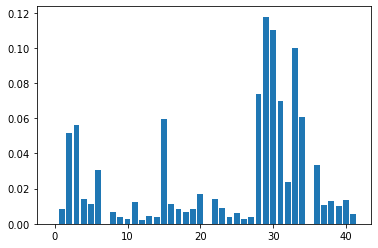

In [25]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
X, y = train_df[list(train_df.columns)[:-1]],train_df['Label']
dt = RandomForestClassifier()
dt.fit(X, y)
importance = dt.feature_importances_
# summarize feature importance
for i in range(len(importance)):
    print('Feature:', train_df.columns[i]," Importance: ",importance[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Ans: 

The three most important time-domain features are: min, max and standard deviation.
min and max would help understand the boundaries of a feature and standard deviation would help understand the variance of the data in a feature.
All three combined would give a clear idea of how the data is.

**2. ISLR 3.7.4**

**a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

Ans: The training RSS of the cubic regression would be lower.
RSS is dependent on distribution of datapoints. In case of cubic regression the model will fit the datapoints better i.e it is more flexible.
Thus polynomial regression has lower training RSS than the linear fit because of its high flexibility.



**b) Answer (a) using test rather than training RSS.**

Ans: The test RSS of linear regression will be lower than the test RSS of cubic regression. This is because the true relationship between X and Y is linear, cubic regression will have a higher variance which cannot be offseted by the bias (since true form is linear).


**c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

Ans: The training RSS for the cubic regression will be lower than linear regression. This is because higher flexibility will follow the training data more closely. Hence cubic regression will have lower RSS.


**d) Answer (c) using test rather than training RSS.**

For the test data we cannot conclude anything without observing the data.
There is no knowledege how far the true relationship is far from linear in this case. 
If the true relationship between X and Y is closer to linear than cubic, the test RSS for linear regression will be lower than cubic regression and vice versa.

**3. Extra Practice (you do not need to submit the answers): ISLR 3.7.3, 3.7.5.**

**Reference Links:**\
https://www.statology.org/bootstrapping-in-python/